# Import necessary settings and modules

In [81]:
import pandas as pd
import os
import sys
import json
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data

In [64]:
df_business = pd.read_json(os.getcwd()+'/yelp_dataset/yelp_academic_dataset_business.json', lines=True)                                  

In [82]:
print(df_business.shape)

(124, 7)


In [53]:
print(df_business.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   209393 non-null  object 
 1   name          209393 non-null  object 
 2   address       209393 non-null  object 
 3   city          209393 non-null  object 
 4   state         209393 non-null  object 
 5   postal_code   209393 non-null  object 
 6   latitude      209393 non-null  float64
 7   longitude     209393 non-null  float64
 8   stars         209393 non-null  float64
 9   review_count  209393 non-null  int64  
 10  is_open       209393 non-null  int64  
 11  attributes    180348 non-null  object 
 12  categories    208869 non-null  object 
 13  hours         164550 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 22.4+ MB
None


In [54]:
df_business['city'].describe()

count        209393
unique         1251
top       Las Vegas
freq          31631
Name: city, dtype: object

In [38]:
len(business_ids)

124

# Business data exploration 

## i) Number of businesses in each city:

<AxesSubplot:xlabel='city'>

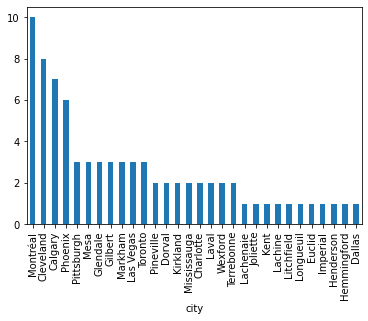

In [50]:
df_bus_groups = df_business.groupby('city').count()
df_bus_city = df_bus_groups['name']
df_bus_city_sorted = df_bus_city.sort_values(ascending = False)
df_bus_city_sorted[:30].plot(kind = 'bar')

## ii) Different Type of Businesses and their Count:

<AxesSubplot:>

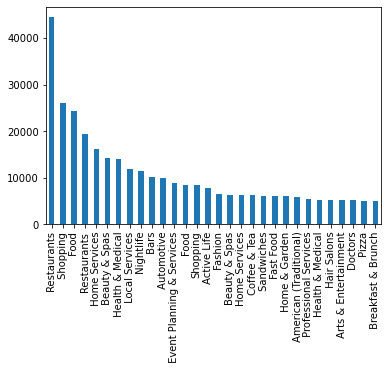

In [56]:
uniq_cat_dict = {}
for i in df_business.categories:
    cat = str(i).split(',')
    for j in cat:
        if j not in uniq_cat_dict.keys():
            uniq_cat_dict[j] = 1
        else:
            uniq_cat_dict[j] += 1
uniq_cat_series = pd.Series(uniq_cat_dict)
uniq_cat_series.sort_values(ascending = False, inplace = True)
uniq_cat_series[:30].plot(kind = 'bar')

## iii) Business and City Ordered pairs and their count:

<AxesSubplot:>

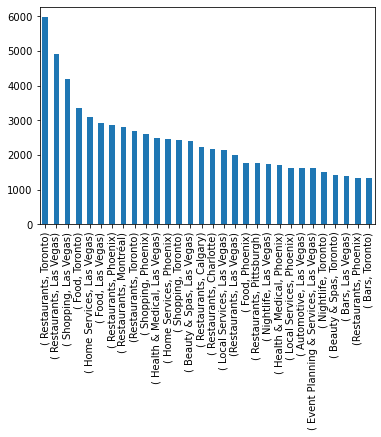

In [59]:
business_city = {}
n = len(df_business)
for i in range(n):
    k1 = str(df_business.categories.iloc[i]).split(',')
    k2 = df_business.city.iloc[i]
    for j in k1:
        k = (j,k2)
        if k not in business_city.keys():
            business_city[k] = 1
        else:
            business_city[k] += 1
business_city_series = pd.Series(business_city)
business_city_series.sort_values(ascending = False, inplace = True)
business_city_series[:30].plot(kind = 'bar')

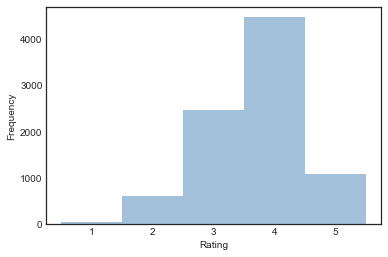

In [27]:
restaurant_reviews = df_business.select('stars_restaurant').collect()
restaurant_reviews_list = [restaurant_reviews[i][0] for i in range(len(restaurant_reviews))]


plt.hist(restaurant_reviews_list, bins=[0.5,1.5,2.5,3.5,4.5,5.5], alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')
plt.ylabel('Frequency')
plt.xlabel('Rating')
plt.style.use('seaborn-white')

It can be seen that most of the businesses listed on the Yelp are Restaurants, Shopping places and Recreational Centers. For this given data set (obtained from Yelp's Website), top cities with maximum businesses are Las Vegas, Phoenix, and Toronto.

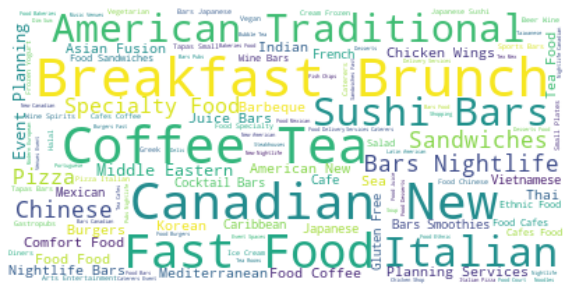

In [31]:
restaurant_categories = df_business.select('categories').collect()
restaurant_categories_list = [restaurant_categories[i][0] for i in range(len(restaurant_categories))]
text = " ".join(review for review in restaurant_categories_list)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# eliminate useless words
text = text.replace('Restaurants', "")
text = text.replace('bars', "")
text = text.replace('food', "")


# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Filter Business Data by keeping only open businesses that falls in Restaurants category. 

## Filter Rows and Columns

Our dataset contains many columns, and most of them won’t be used in this project. From the table df_business, we want only the essential features of businesses such as the <b> id, name, stars, category and so on </b>. We are exclusively interested in companies that are restaurants and in the city of Toronto. Therefore we apply the function filter in the columns city and category to enforce this restriction.

In [65]:
df_business = df_business[["business_id","name", "stars", 
                                 "review_count", "attributes", 
                                 "categories", "city", "is_open"]] 

df_business = df_business[(df_business.categories.isin(['Restaurants']))
                                & (df_business['review_count'] > 0) & (df_business['is_open'] == 1)].drop('is_open', axis=1)
#collecting unqiue business ids for later use 
business_ids = df_business['business_id'].unique()

In [66]:
print(df_business.count())

business_id     124
name            124
stars           124
review_count    124
attributes       92
categories      124
city            124
dtype: int64


In [15]:
print(df_user.count())

1968703


In [67]:
len(business_ids)

124

In [48]:
print(df_business.count())

business_id     124
name            124
stars           124
review_count    124
attributes       92
categories      124
city            124
dtype: int64


In [46]:
# df_business.write.parquet('output/business.parquet')
df_business['city']

1518                New Kensington
1882                         Laval
2030                        Mentor
2253      Saint-Jean-sur-Richelieu
2683                     Cleveland
                    ...           
200560                   Las Vegas
201284                        Mesa
201879                     Concord
204383                   Henderson
206784                    Glendale
Name: city, Length: 124, dtype: object

In [20]:
df_business.columns

['business_id',
 'name',
 'stars_restaurant',
 'review_count',
 'attributes',
 'categories',
 'state']

## Reading Review json data in streams

### Keeping only "restaurant" business data and other associated data on users and reviews

We reduced the business dataset to businesses that had “Restaurant” in the category (restaurants). After reducing the business dataset, we reduced our review dataset in two ways:

- Only including reviews for businesses that existed in the reduced business (restaurant) dataset
- Only including reviews for users that have at least 2 reviews (A single rating does not help determine similarities between restaurants)

In [39]:
df_yelp_review_iter = pd.read_json(os.getcwd()+'/yelp_dataset/yelp_academic_dataset_review.json', chunksize=100000, lines=True)                                                                    

In [40]:
df_yelp_review_iter

In [41]:
df_yelp_review = pd.DataFrame()
for df in df_yelp_review_iter:
    print(df.shape)
    df = df[df['business_id'].isin(business_ids)]
    df_yelp_review = pd.concat([df_yelp_review, df])

(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(100000, 9)
(21122, 9)


In [44]:
len(df_yelp_review['business_id'].unique())

124

In [62]:
df_yelp_review.count()

review_id      730
user_id        730
business_id    730
stars          730
useful         730
funny          730
cool           730
text           730
date           730
dtype: int64

## Cleaning review data

In [61]:
df_yelp_review_reduced = df_yelp_review.drop(['text','useful','cool', 'date', 'funny'], axis = 1)
df_yelp_review_reduced.head()

,review_id,user_id,business_id,stars
2939,3bMgLXMLzm89C_0mkbIFOA,j9hC9EmCsS2S2ZtbsK-l0g,5Q4Gw1pyZnG8IlFNozxIlw,2
11808,slhog3p6YaoVEej3USo2Iw,IJ1wbXUh_B5Yn6U1YWHy4g,5Q4Gw1pyZnG8IlFNozxIlw,1
17840,fmdPlzK-gaE0epWY9NntPw,SC-D-uPqG1lq65iTHkct-A,G3tC4w70WyJ3Mk8udzENLQ,4
50709,3UjVt6Yzm19JTHyA1kNLgQ,APqqWOMllLwpdWjgGGjoEA,RUyvZomtYaAU4Ryrp1-lJg,4
54820,PwouCndo4S4ggnGgPX9Rng,x459culD4Wy_auLcAoQgrw,pq38ABFpgiLKhJPUCj7ttg,3


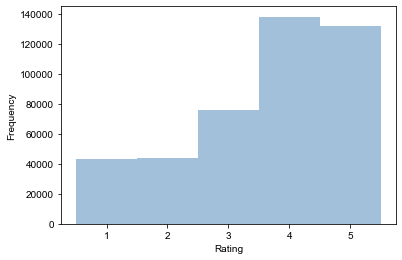

In [26]:
reviews = df_review.select('stars').collect()
review_list = [reviews[i][0] for i in range(len(reviews))]

plt.hist(review_list, bins=[0.5,1.5,2.5,3.5,4.5,5.5], alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')
plt.ylabel('Frequency')
plt.xlabel('Rating')
plt.style.use('seaborn-white')

Most ratings are above 3. Now let’s see the distribution of ratings of each restaurant.

Here were see a more normally distributed curve. Aditionally we can see that most restaurants do pretty well in terms of average rating. Now let’s visualise what the most popular type of restaurants in Toronto are. What kind of food do they serve? We will create a word cloud.

## Merging Business data with Review data

From the table df_review, we want only the reviews from the selected table above. We can merge df_review and df_business to eliminate all other businesses from the table reviews.

In [68]:
df_merged = df_yelp_review_reduced.merge(df_business.rename(columns={"stars": "restuarant_stars"}), 
                                         how = 'inner', on= 'business_id')
df_merged.head()

,review_id,user_id,business_id,stars,name,restuarant_stars,review_count,attributes,categories,city
0,3bMgLXMLzm89C_0mkbIFOA,j9hC9EmCsS2S2ZtbsK-l0g,5Q4Gw1pyZnG8IlFNozxIlw,2,Native New Yorker Restaurant,3.0,22,"{'RestaurantsTakeOut': 'True', 'Ambience': '{'...",Restaurants,Gilbert
1,slhog3p6YaoVEej3USo2Iw,IJ1wbXUh_B5Yn6U1YWHy4g,5Q4Gw1pyZnG8IlFNozxIlw,1,Native New Yorker Restaurant,3.0,22,"{'RestaurantsTakeOut': 'True', 'Ambience': '{'...",Restaurants,Gilbert
2,noxz5btWWJjSpbUBmregVQ,_L-JKT5OahgimFlVOo708w,5Q4Gw1pyZnG8IlFNozxIlw,4,Native New Yorker Restaurant,3.0,22,"{'RestaurantsTakeOut': 'True', 'Ambience': '{'...",Restaurants,Gilbert
3,gmiMXHSb6loIDxopmOWHSA,x_I7IDsFeT4vVcEBZLqr7A,5Q4Gw1pyZnG8IlFNozxIlw,5,Native New Yorker Restaurant,3.0,22,"{'RestaurantsTakeOut': 'True', 'Ambience': '{'...",Restaurants,Gilbert
4,xfgHmu5n7cg-uNoU2C1lZg,ceLFSre4hrzkT5VpSlt2Lg,5Q4Gw1pyZnG8IlFNozxIlw,3,Native New Yorker Restaurant,3.0,22,"{'RestaurantsTakeOut': 'True', 'Ambience': '{'...",Restaurants,Gilbert


In [83]:
df_merged.count()

review_id           730
user_id             730
business_id         730
stars               730
name                730
restuarant_stars    730
review_count        730
attributes          622
categories          730
city                730
dtype: int64

In [84]:
display(df_merged.head(), df_merged.shape, df_merged.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   review_id         730 non-null    object 
 1   user_id           730 non-null    object 
 2   business_id       730 non-null    object 
 3   stars             730 non-null    int64  
 4   name              730 non-null    object 
 5   restuarant_stars  730 non-null    float64
 6   review_count      730 non-null    int64  
 7   attributes        622 non-null    object 
 8   categories        730 non-null    object 
 9   city              730 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 62.7+ KB


,review_id,user_id,business_id,stars,name,restuarant_stars,review_count,attributes,categories,city
0,3bMgLXMLzm89C_0mkbIFOA,j9hC9EmCsS2S2ZtbsK-l0g,5Q4Gw1pyZnG8IlFNozxIlw,2,Native New Yorker Restaurant,3.0,22,"{'RestaurantsTakeOut': 'True', 'Ambience': '{'...",Restaurants,Gilbert
1,slhog3p6YaoVEej3USo2Iw,IJ1wbXUh_B5Yn6U1YWHy4g,5Q4Gw1pyZnG8IlFNozxIlw,1,Native New Yorker Restaurant,3.0,22,"{'RestaurantsTakeOut': 'True', 'Ambience': '{'...",Restaurants,Gilbert
2,noxz5btWWJjSpbUBmregVQ,_L-JKT5OahgimFlVOo708w,5Q4Gw1pyZnG8IlFNozxIlw,4,Native New Yorker Restaurant,3.0,22,"{'RestaurantsTakeOut': 'True', 'Ambience': '{'...",Restaurants,Gilbert
3,gmiMXHSb6loIDxopmOWHSA,x_I7IDsFeT4vVcEBZLqr7A,5Q4Gw1pyZnG8IlFNozxIlw,5,Native New Yorker Restaurant,3.0,22,"{'RestaurantsTakeOut': 'True', 'Ambience': '{'...",Restaurants,Gilbert
4,xfgHmu5n7cg-uNoU2C1lZg,ceLFSre4hrzkT5VpSlt2Lg,5Q4Gw1pyZnG8IlFNozxIlw,3,Native New Yorker Restaurant,3.0,22,"{'RestaurantsTakeOut': 'True', 'Ambience': '{'...",Restaurants,Gilbert


(730, 10)

None

In [78]:
df_cleaned = df_merged.dropna()

In [79]:
def topm_num_reviews_for_city_n_biz(df,m):
    business_city_count = {}
    n = len(df)
    for i in range(n):
        k1 = str(df.categories.iloc[i]).split(',')
        k2 = df.city.iloc[i]
        for j in k1:
            k = (j,k2)
            if k not in business_city_count.keys():
                business_city_count[k] = 1
            else:
                business_city_count[k] += 1
    business_city_count_series = pd.Series(business_city_count)
    business_city_count_series.sort_values(ascending = False, inplace = True)
    return business_city_count_series

<AxesSubplot:>

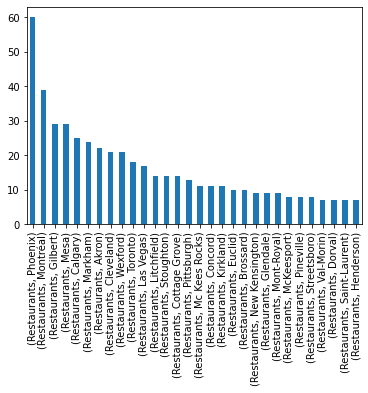

In [80]:
review_business_city = topm_num_reviews_for_city_n_biz(df_cleaned,10)
review_business_city[:30].plot(kind = 'bar')

## Loading & filtering Users Data in stream

1. We just keep the relevant users' data by. keeping only user ids that exists in the previous datasets.

In [88]:
user_ids = df_cleaned['user_id'].unique()

df_yelp_user_iter = pd.read_json(os.getcwd()+'/yelp_dataset/yelp_academic_dataset_user.json', chunksize=100000, lines=True)                                                                    

df_yelp_user = pd.DataFrame()
for df in df_yelp_user_iter:
    print(df.shape)
    df = df[df['user_id'].isin(user_ids)]
    df_yelp_user = pd.concat([df_yelp_user, df])

(100000, 22)
(100000, 22)
(100000, 22)
(100000, 22)
(100000, 22)
(100000, 22)
(100000, 22)
(100000, 22)
(100000, 22)
(100000, 22)
(100000, 22)
(100000, 22)
(100000, 22)
(100000, 22)
(100000, 22)
(100000, 22)
(100000, 22)
(100000, 22)
(100000, 22)
(68703, 22)


In [89]:
len(user_ids_list)

599

In [90]:
display(df_yelp_user.shape, df_yelp_user.info(), df_yelp_user.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 353 to 1961296
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             599 non-null    object 
 1   name                599 non-null    object 
 2   review_count        599 non-null    int64  
 3   yelping_since       599 non-null    object 
 4   useful              599 non-null    int64  
 5   funny               599 non-null    int64  
 6   cool                599 non-null    int64  
 7   elite               599 non-null    object 
 8   friends             599 non-null    object 
 9   fans                599 non-null    int64  
 10  average_stars       599 non-null    float64
 11  compliment_hot      599 non-null    int64  
 12  compliment_more     599 non-null    int64  
 13  compliment_profile  599 non-null    int64  
 14  compliment_cute     599 non-null    int64  
 15  compliment_list     599 non-null    int64  
 16  co

(599, 22)

None

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
353,PBSk4cQN8gA8ysKFz32PLA,Jen,137,2010-03-26 21:31:12,191,45,47,,"lOoQvKPyo1ZWIrGagK76tw, KbOh3Nl07lBHFSzbknGoJA...",1,...,2,0,0,0,4,2,1,1,3,1
498,UG4EKu13JRwzRix6ESINdg,Edward,1138,2009-06-05 16:32:55,2618,1149,1537,"2011,2012,2013,2014,2015,2016,2017,2018","cZzrlxbs_JaYW1hraGfzaw, 7nGjCzVTDKTnbRv3gA-TMg...",57,...,13,2,2,0,57,117,97,97,19,4
635,hWDybu_KvYLSdEFzGrniTw,Bruce,12487,2009-03-08 21:47:44,108027,68719,90202,"2010,2011,2012,2013,2014,2015,2016,2017,2018","OK-GE2QwR_D3qi5jrX8RsA, gjhzKWsqCIrpEd9pevbKZw...",659,...,500,413,23,71,1450,3315,3605,3605,2857,1418
669,R6a_3dRlJI6n_yX2eToxuw,Jason,76,2009-01-10 04:48:49,224,144,129,"2014,2015","KyNlp_L4Db7XdFTd8sXXyg, y8aWXOimQ9ZgUgZ6q--nCQ...",7,...,1,0,1,0,2,1,6,6,6,1
703,PpBzb-w7JlSuML_-GpORcw,Peter,156,2009-03-28 19:26:20,412,111,218,"2010,2011,2012","j0WX8LAbLhBnnGJoXjmokw, C4vGVpVCucQXKR90PNJY7w...",13,...,4,0,0,1,8,10,32,32,9,0


## Filter users data

In [92]:
df_yelp_user = df_yelp_user[["user_id","name", "review_count"]]
df_yelp_user_reduced = df_yelp_user[df_yelp_user['review_count'] > 1]
# df_user = df_user.join(df_review, on='user_id', how='inner'

In [93]:
df_yelp_user_reduced

,user_id,name,review_count
353,PBSk4cQN8gA8ysKFz32PLA,Jen,137
498,UG4EKu13JRwzRix6ESINdg,Edward,1138
635,hWDybu_KvYLSdEFzGrniTw,Bruce,12487
669,R6a_3dRlJI6n_yX2eToxuw,Jason,76
703,PpBzb-w7JlSuML_-GpORcw,Peter,156
...,...,...,...
1852570,hr4Vr1Yhe1R6Zqjt7sgWYA,Lisa,9
1873668,G_5FE1nWDYxkbLlSdshvGw,M,6
1880415,jz_U69JhLVoGtJRvChWzRA,Maria,2
1945338,lygwv7tz0bPYi1xuXV4DaA,Jean-claude,9


## Save files to a csv format

In [95]:
df_merged.to_csv("output/business_review.csv")
df_yelp_user_reduced.to_csv("output/user.csv")
# df.to_csv(file_name, sep='\t')